**Group 7 Image Compression with SVD Project**

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1. Load grayscale image
img = Image.open('PP.jpeg')
img = img.convert('L')
A = img
m, n = A.size

# 2. SVD decomposition
U, s, Vt = np.linalg.svd(A, full_matrices=False)
print(U.shape)
print(s.shape)
print(Vt.shape)

(495, 495)
(495,)
(495, 736)


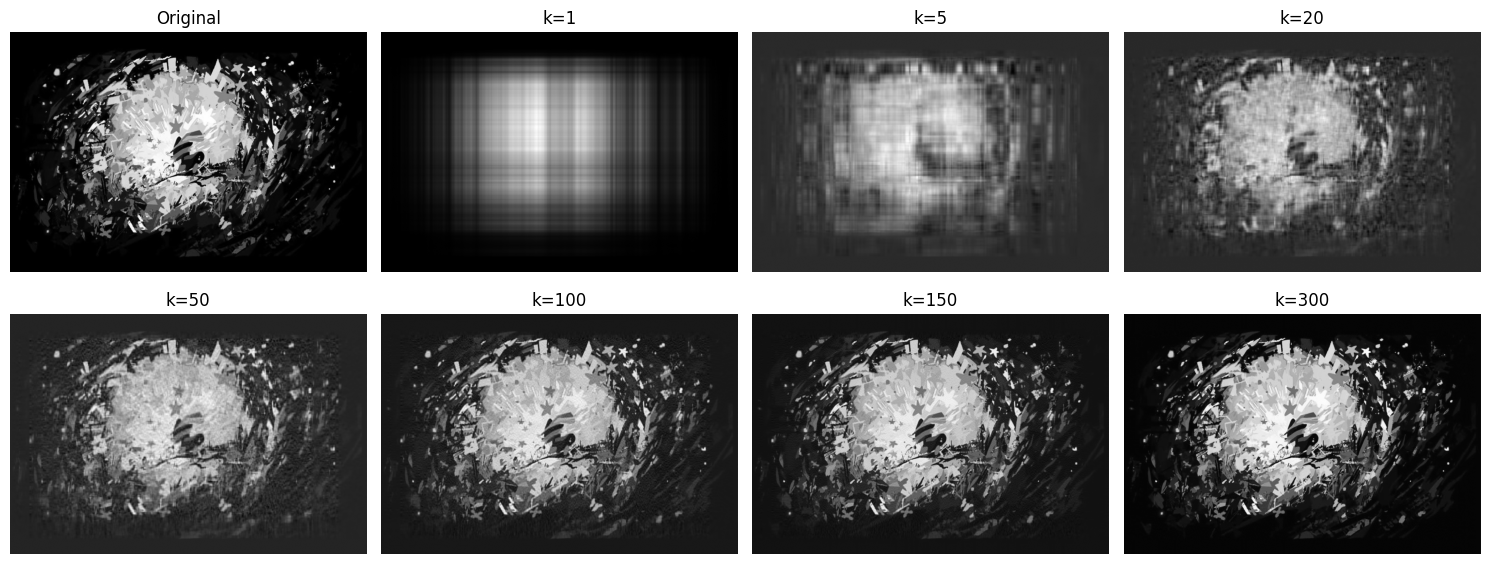

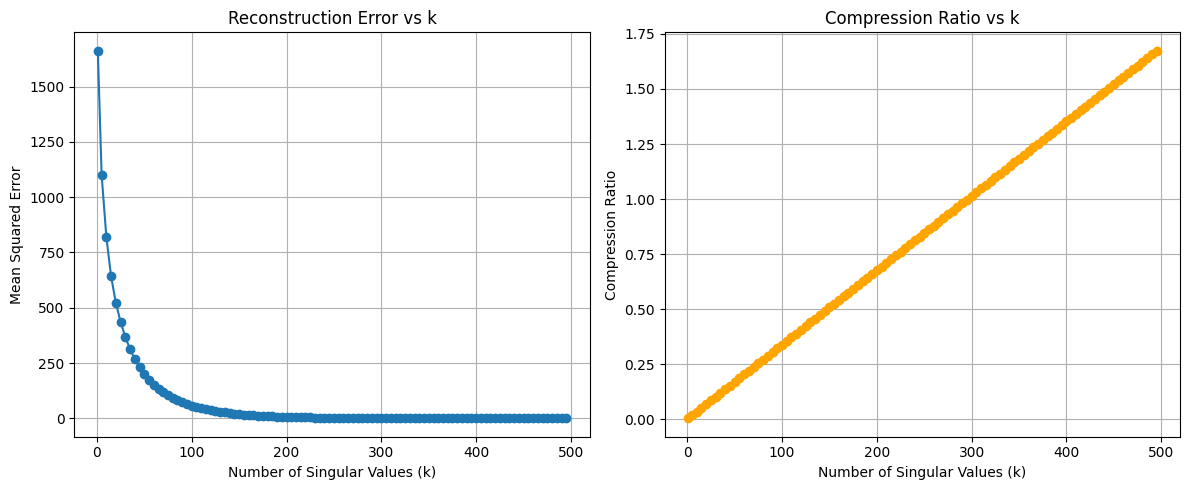

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1. Load grayscale image
img = Image.open('PP.jpeg')
img = img.convert('L')
A = img
m, n = A.size

# 2. SVD decomposition
U, s, Vt = np.linalg.svd(A, full_matrices=False)

# 3. Reconstruct function
def reconstruct_image(k):
    S_k = np.diag(s[:k])
    return U[:, :k] @ S_k @ Vt[:k, :]

# 4. Compute reconstruction for multiple k values
ks = np.arange(0, len(s)+1, 5)  # sample every 5 singular values
ks[0] = 1
mse_list = []
compression_ratio_list = []

for k in ks:
    A_k = reconstruct_image(k)
    # Mean Squared Error
    mse = np.mean((A - A_k)**2)
    mse_list.append(mse)
    # Compression ratio = number of stored values / original size
    # Store: k singular values + k*m for U + k*n for Vt
    stored_values = k * (m + n + 1)
    compression_ratio = stored_values / (m * n)
    compression_ratio_list.append(compression_ratio)

# 5. Plot example reconstructions
example_ks = [1, 5, 20, 50, 100, 150, 300]
plt.figure(figsize=(15, 6))
plt.subplot(2, 4, 1)
plt.imshow(A, cmap='gray')
plt.title("Original")
plt.axis('off')

for i, k in enumerate(example_ks, start=2):
    plt.subplot(2, 4, i)
    plt.imshow(reconstruct_image(k), cmap='gray')
    plt.title(f"k={k}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# 6. Plot MSE and compression ratio curves
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ks, mse_list, marker='o')
plt.xlabel("Number of Singular Values (k)")
plt.ylabel("Mean Squared Error")
plt.title("Reconstruction Error vs k")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(ks, compression_ratio_list, marker='o', color='orange')
plt.xlabel("Number of Singular Values (k)")
plt.ylabel("Compression Ratio")
plt.title("Compression Ratio vs k")
plt.grid()

plt.tight_layout()
plt.show()


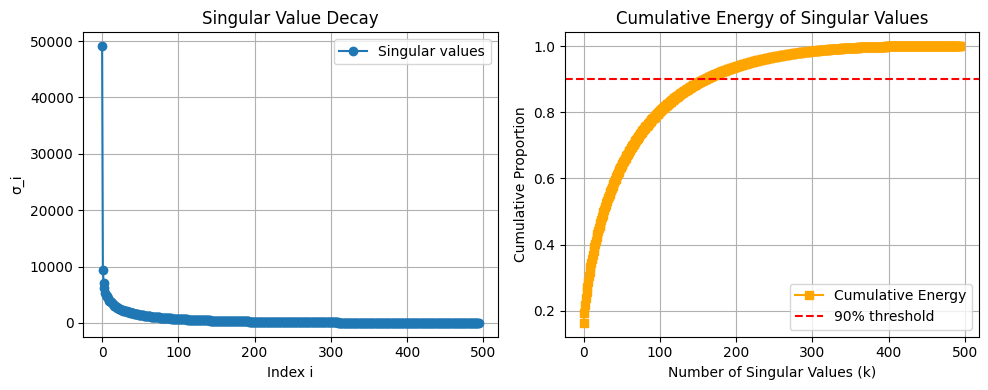

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# 1. Load grayscale image
img = Image.open('PP.jpeg')
img = img.convert('L')
A = img

# 2. SVD
U, s, Vt = np.linalg.svd(A, full_matrices=False)

# 3. plot σ_i values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(s, 'o-', label='Singular values')
plt.title('Singular Value Decay')
plt.xlabel('Index i')
plt.ylabel('σ_i')
plt.grid(True)
plt.legend()

# 4. Cumulative Proportion of σ_i values
cumulative_energy = np.cumsum(s) / np.sum(s)
plt.subplot(1, 2, 2)
plt.plot(cumulative_energy, 's-', color='orange', label='Cumulative Energy')
plt.axhline(0.9, color='red', linestyle='--', label='90% threshold')
plt.title('Cumulative Energy of Singular Values')
plt.xlabel('Number of Singular Values (k)')
plt.ylabel('Cumulative Proportion')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
